In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
#import matplotlib.pyplot as plt

from load_datasets import load_diabetes, load_breast_cancer, load_svmguide1, load_australian, load_mushrooms, load_german
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_7536\3009221975.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
kdiagnostic = 200
C = 1
ktuning = 400

# Diabetes

In [3]:
data_diab = load_diabetes()

X_train = (614, 9), y_train = (614,)
X_test = (154, 9), y_test = (154,)
Class distribution: {-1.0: 0.3469055374592834, 1.0: 0.6530944625407166}
sklearn train score: 0.762215
sklearn test score: 0.753247
sklearn sol norm: 4.2118903914028545


In [4]:
#CDiab = 1
MDiab = 8
#kDiab = 200
print(f"Iterations: {data_diab[1].size / MDiab}")

Iterations: 76.75


## Benchmark

In [5]:
benchDiab = run_bench(data_diab, C)

benchDiab_data = optim_bench(benchDiab)

C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\models.py:43: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  model = minimize(f_and_df_log, w0, args=(X_train, y_train, self.C),
C:\Users\Utente\Documents\Python Projects\Optimization-Project\py\models.py:43: RuntimeWarning: Method CG does not use Hessian information (hess).
  model = minimize(f_and_df_log, w0, args=(X_train, y_train, self.C),


## SGD

In [6]:
# BatchGD-Fixed
batchfixed_diab = run_solvers("SGD-Fixed", C, data_diab, kdiagnostic, data_diab[1].size, (1, 0.1, 0.01))

In [7]:
# SGD-Fixed
sgdfixed_diab = run_solvers("SGD-Fixed", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01))

In [8]:
# SGD-Decreasing
sgddecre_diab = run_solvers("SGD-Decreasing", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01))

In [9]:
# SGDM
sgdm_diab = run_solvers("SGDM", C, data_diab, kdiagnostic, MDiab, (0.5, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [10]:
# SGD-Armijo
sgdarmijo_diab = run_solvers("SGD-Armijo", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01))

In [11]:
# MSL-SGDM-C
mslc_diab = run_solvers("MSL-SGDM-C", C, data_diab, kdiagnostic, MDiab, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [12]:
# MSL-SGDM-R
mslr_diab = run_solvers("MSL-SGDM-R", C, data_diab, kdiagnostic, MDiab, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [13]:
modelsDiab_data = optim_data(batchfixed_diab + sgdfixed_diab + sgddecre_diab + sgdm_diab + sgdarmijo_diab + mslc_diab + mslr_diab)

## Summary

In [14]:
models_summary(modelsDiab_data, benchDiab_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,1.328870e-06,NaN,5,0.653094,0.642857,0.193861
3,SGD-Fixed,1,614.0,1.00,0.0,0.662128,1.897459e-16,0.015643,200,0.653094,0.642857,0.193861
4,SGD-Fixed,1,614.0,0.10,0.0,0.662128,9.497691e-10,0.015718,200,0.653094,0.642857,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,2.752638e-06,NaN,6,0.653094,0.642857,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,1.367774e-05,NaN,6,0.653094,0.642857,0.193861
10,SGD-Decreasing,1,8.0,0.10,0.0,0.662128,1.419826e-04,0.195432,200,0.653094,0.642857,0.193965
17,SGD-Armijo,1,8.0,0.01,0.0,0.662128,2.574829e-04,1.494223,200,0.653094,0.642857,0.193884
22,MSL-SGDM-R,1,8.0,0.10,0.9,0.662128,6.167812e-04,1.489223,200,0.653094,0.642857,0.193721
9,SGD-Decreasing,1,8.0,0.50,0.0,0.662128,8.207331e-04,0.215486,200,0.653094,0.642857,0.193546
19,MSL-SGDM-C,1,8.0,0.10,0.9,0.662128,7.333791e-04,1.534407,200,0.653094,0.642857,0.193800


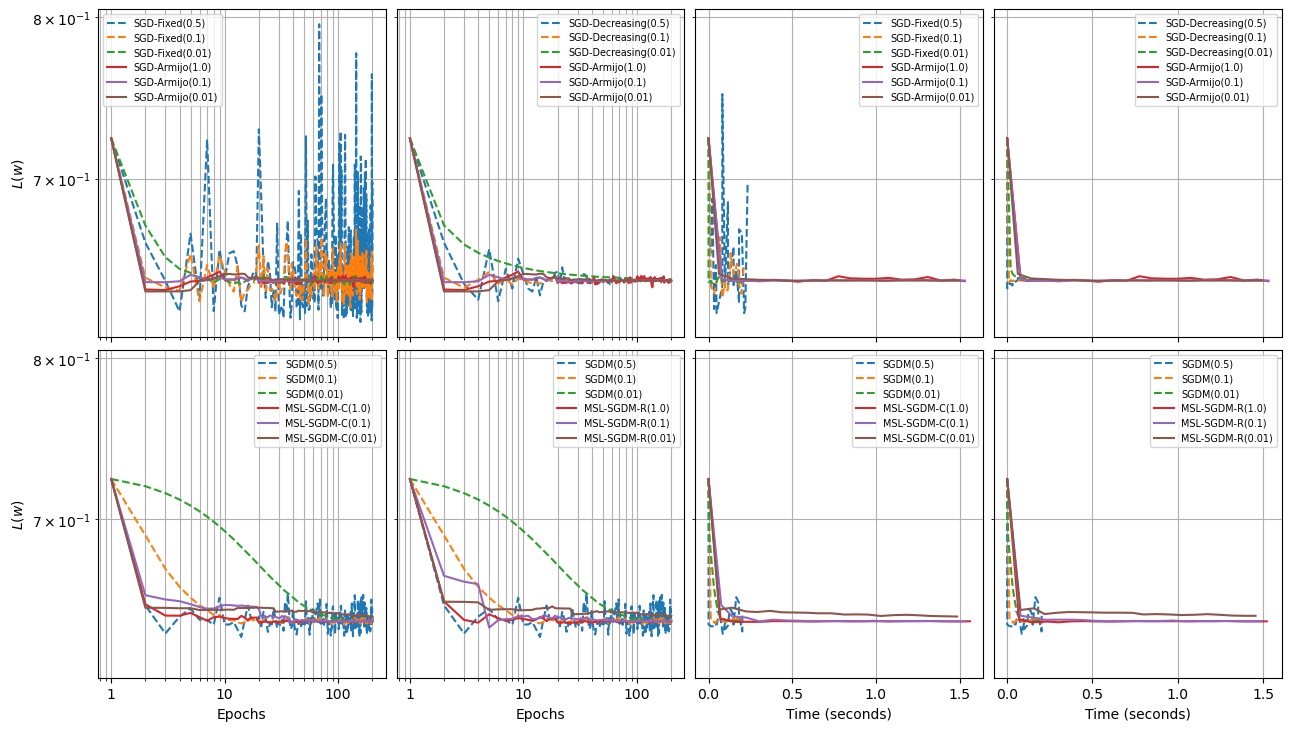

In [15]:
diagnostic(
    optim_data(sgdfixed_diab + sgdarmijo_diab),
    optim_data(sgddecre_diab + sgdarmijo_diab),
    optim_data(sgdm_diab + mslc_diab),
    optim_data(sgdm_diab + mslr_diab),
    benchDiab[0])
plt.savefig("./plots/diab-diagnostic.pdf")

## Fine-tuning

In [16]:
batchfixed_diab1 = LogisticRegression("SGD-Fixed", C).fit(data_diab, ktuning, data_diab[1].size, 0.75, stop=1)

In [17]:
sgdfixed_diab1 = LogisticRegression("SGD-Fixed", C).fit(data_diab, ktuning, MDiab, 0.005, stop=1)

In [18]:
sgddecre_diab1 = LogisticRegression("SGD-Decreasing", C).fit(data_diab, ktuning, MDiab, 1, stop=1)

In [19]:
sgdm_diab1 = LogisticRegression("SGDM", C).fit(data_diab, ktuning, MDiab, 0.05, 0.9, stop=1)

In [20]:
sgdarmijo_diab1 = LogisticRegression("SGD-Armijo", C).fit(data_diab, ktuning, MDiab, 0.1, stop=1)

In [21]:
mslc_diab1 = LogisticRegression("MSL-SGDM-C", C).fit(data_diab, ktuning, MDiab, 1, 0.9, stop=1)

In [22]:
mslr_diab1 = LogisticRegression("MSL-SGDM-R", C).fit(data_diab, ktuning, MDiab, 0.5, 0.9, stop=1)

In [23]:
fine_diab_data = optim_data([batchfixed_diab1, sgdfixed_diab1, sgddecre_diab1, sgdm_diab1, sgdarmijo_diab1, mslc_diab1, mslr_diab1])

test_diab = models_summary(fine_diab_data, benchDiab_data)
test_diab.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.662128,0.000001,NaN,5,0.653094,0.642857,0.193861
2,CG,1,NaN,NaN,NaN,0.662128,0.000003,NaN,6,0.653094,0.642857,0.193861
0,L-BFGS,1,NaN,NaN,NaN,0.662128,0.000014,NaN,6,0.653094,0.642857,0.193861
3,SGD-Fixed,1,614.0,0.750,0.0,0.662128,0.000489,0.001000,6,0.653094,0.642857,0.193988
7,SGD-Armijo,1,8.0,0.100,0.0,0.662128,0.000867,1.316844,174,0.653094,0.642857,0.193432
4,SGD-Fixed,1,8.0,0.005,0.0,0.662128,0.000873,0.026102,25,0.653094,0.642857,0.193979
5,SGD-Decreasing,1,8.0,1.000,0.0,0.662128,0.000953,0.154128,155,0.653094,0.642857,0.193410
6,SGDM,1,8.0,0.050,0.9,0.662129,0.000927,0.077861,82,0.653094,0.642857,0.193783
8,MSL-SGDM-C,1,8.0,1.000,0.9,0.662129,0.000951,0.748759,98,0.653094,0.642857,0.193912
9,MSL-SGDM-R,1,8.0,0.500,0.9,0.662129,0.000987,0.994292,129,0.653094,0.642857,0.193932


In [24]:
print(test_diab[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS & NaN & 6 & NaN & 0.662128 & 0.000014 & 0.642857 \\
Newton-CG & NaN & 5 & NaN & 0.662128 & 0.000001 & 0.642857 \\
CG & NaN & 6 & NaN & 0.662128 & 0.000003 & 0.642857 \\
SGD-Fixed & 0.750000 & 6 & 0.001000 & 0.662128 & 0.000489 & 0.642857 \\
SGD-Fixed & 0.005000 & 25 & 0.026102 & 0.662128 & 0.000873 & 0.642857 \\
SGD-Decreasing & 1.000000 & 155 & 0.154128 & 0.662128 & 0.000953 & 0.642857 \\
SGDM & 0.050000 & 82 & 0.077861 & 0.662129 & 0.000927 & 0.642857 \\
SGD-Armijo & 0.100000 & 174 & 1.316844 & 0.662128 & 0.000867 & 0.642857 \\
MSL-SGDM-C & 1.000000 & 98 & 0.748759 & 0.662129 & 0.000951 & 0.642857 \\
MSL-SGDM-R & 0.500000 & 129 & 0.994292 & 0.662129 & 0.000987 & 0.642857 \\
\bottomrule
\end{tabular}



# Breast cancer

In [4]:
data_breast = load_breast_cancer()

X_train = (546, 11), y_train = (546,)
X_test = (137, 11), y_test = (137,)
Class distribution: {-1: 0.6684981684981685, 1: 0.3315018315018315}
sklearn train score: 0.972527
sklearn test score: 0.948905
sklearn sol norm: 4.617507942191202


In [26]:
#CBreast = 1
MBreast = 8
#kBreast = 200
print(f"Iterations: {data_breast[1].size / MBreast}")

Iterations: 68.25


## Benchmark

In [27]:
benchBreast = run_bench(data_breast, C)

benchBreast_data = optim_bench(benchBreast)

## SGD

In [28]:
# BatchGD-Fixed
batchfixed_breast = run_solvers("SGD-Fixed", C, data_breast, kdiagnostic, data_breast[1].size, (1, 0.1, 0.01))

In [29]:
# SGD-Fixed
sgdfixed_breast = run_solvers("SGD-Fixed", C, data_breast, kdiagnostic, MBreast, (0.5, 0.1, 0.01))

In [30]:
# SGD-Decreasing
sgddecre_breast = run_solvers("SGD-Decreasing", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01))

In [31]:
# SGDM
sgdm_breast = run_solvers("SGDM", C, data_breast, kdiagnostic, MBreast, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [32]:
# SGD-Armijo
sgdarmijo_breast = run_solvers("SGD-Armijo", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01))

In [33]:
# MSL-SGDM-C
mslc_breast = run_solvers("MSL-SGDM-C", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [34]:
# MSL-SGDM-R
mslr_breast = run_solvers("MSL-SGDM-R", C, data_breast, kdiagnostic, MBreast, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [35]:
modelsBreast_data = optim_data(batchfixed_breast + sgdfixed_breast + sgddecre_breast + sgdm_breast + sgdarmijo_breast + mslc_breast + mslr_breast)

## Summary

In [36]:
models_summary(modelsBreast_data, benchBreast_data).sort_values(by="l2-Loss")

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,546.0,0.10,0.0,0.492561,8.064461e-10,0.025524,200,0.902930,0.817518,0.447463
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.902930,0.817518,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.902930,0.817518,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.902930,0.817518,0.447463
10,SGD-Decreasing,1,8.0,0.10,0.0,0.492561,1.923749e-04,0.184381,200,0.902930,0.817518,0.447564
17,SGD-Armijo,1,8.0,0.01,0.0,0.492561,1.983322e-04,1.319716,200,0.902930,0.817518,0.447515
18,MSL-SGDM-C,1,8.0,1.00,0.9,0.492561,1.231716e-03,1.399891,200,0.902930,0.817518,0.447256
16,SGD-Armijo,1,8.0,0.10,0.0,0.492561,1.383638e-03,1.361738,200,0.902930,0.817518,0.447685
14,SGDM,1,8.0,0.01,0.9,0.492562,1.906914e-03,0.171962,200,0.902930,0.817518,0.447558
21,MSL-SGDM-R,1,8.0,1.00,0.9,0.492563,2.121204e-03,1.381436,200,0.902930,0.817518,0.447305


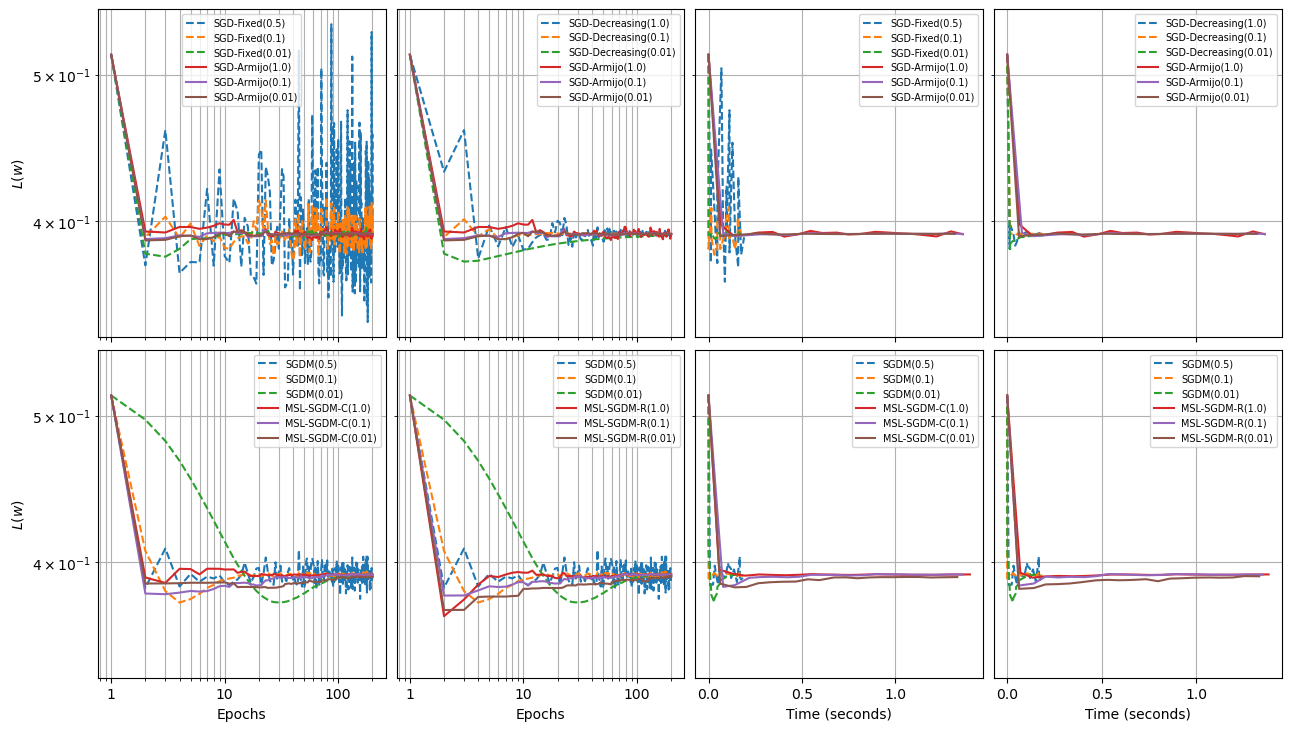

In [37]:
diagnostic(
    optim_data(sgdfixed_breast + sgdarmijo_breast),
    optim_data(sgddecre_breast + sgdarmijo_breast),
    optim_data(sgdm_breast + mslc_breast),
    optim_data(sgdm_breast + mslr_breast),
    benchBreast[0])
plt.savefig("./plots/breast-diagnostic.pdf")

## Fine-tuning

In [38]:
batchfixed_breast1 = LogisticRegression("SGD-Fixed", C).fit(data_breast, ktuning, data_breast[1].size, 0.75, stop=1)

In [39]:
sgdfixed_breast1 = LogisticRegression("SGD-Fixed", C).fit(data_breast, ktuning, MBreast, 0.005, stop=1)

In [40]:
sgddecre_breast1 = LogisticRegression("SGD-Decreasing", C).fit(data_breast, ktuning, MBreast, 1, stop=1)

In [41]:
sgdm_breast1 = LogisticRegression("SGDM", C).fit(data_breast, ktuning, MBreast, 0.04, 0.9, stop=1)

In [42]:
sgdarmijo_breast1 = LogisticRegression("SGD-Armijo", C).fit(data_breast, ktuning, MBreast, 0.05, stop=1)

In [133]:
mslc_breast1 = LogisticRegression("MSL-SGDM-C", C).fit(data_breast, ktuning, MBreast, 0.5, 0.9, stop=1)

In [141]:
mslr_breast1 = LogisticRegression("MSL-SGDM-R", C).fit(data_breast, ktuning, MBreast, 0.75, 0.9, stop=1)

In [142]:
fine_breast_data = optim_data([batchfixed_breast1, sgdfixed_breast1, sgddecre_breast1, sgdm_breast1, sgdarmijo_breast1, mslc_breast1, mslr_breast1])

test_breast = models_summary(fine_breast_data, benchBreast_data)
test_breast.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.492561,6.070183e-07,NaN,7,0.90293,0.817518,0.447463
2,CG,1,NaN,NaN,NaN,0.492561,2.108349e-06,NaN,8,0.90293,0.817518,0.447463
0,L-BFGS,1,NaN,NaN,NaN,0.492561,2.781037e-06,NaN,7,0.90293,0.817518,0.447463
3,SGD-Fixed,1,546.0,0.750,0.0,0.492561,7.985904e-04,0.006008,12,0.90293,0.817518,0.447153
5,SGD-Decreasing,1,8.0,1.000,0.0,0.492561,6.663238e-04,0.143656,156,0.90293,0.817518,0.447604
6,SGDM,1,8.0,0.040,0.9,0.492561,7.878449e-04,0.079183,76,0.90293,0.817518,0.447313
7,SGD-Armijo,1,8.0,0.050,0.0,0.492561,9.974879e-04,0.914558,134,0.90293,0.817518,0.447103
4,SGD-Fixed,1,8.0,0.005,0.0,0.492561,9.515956e-04,0.059732,35,0.90293,0.817518,0.447592
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.492561,9.453639e-04,1.542665,222,0.90293,0.817518,0.447380
9,MSL-SGDM-R,1,8.0,0.750,0.9,0.492561,9.646578e-04,2.508780,358,0.90293,0.817518,0.447428


In [46]:
print(test_breast[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS & NaN & 7 & NaN & 0.492561 & 0.000003 & 0.817518 \\
Newton-CG & NaN & 7 & NaN & 0.492561 & 0.000001 & 0.817518 \\
CG & NaN & 8 & NaN & 0.492561 & 0.000002 & 0.817518 \\
SGD-Fixed & 0.750000 & 12 & 0.006008 & 0.492561 & 0.000799 & 0.817518 \\
SGD-Fixed & 0.005000 & 35 & 0.059732 & 0.492561 & 0.000952 & 0.817518 \\
SGD-Decreasing & 1.000000 & 156 & 0.143656 & 0.492561 & 0.000666 & 0.817518 \\
SGDM & 0.040000 & 76 & 0.079183 & 0.492561 & 0.000788 & 0.817518 \\
SGD-Armijo & 0.050000 & 134 & 0.914558 & 0.492561 & 0.000997 & 0.817518 \\
MSL-SGDM-C & 0.750000 & 353 & 2.465498 & 0.492561 & 0.000977 & 0.817518 \\
MSL-SGDM-R & 0.850000 & 249 & 1.725605 & 0.492561 & 0.000953 & 0.817518 \\
\bottomrule
\end{tabular}



# svmguide1

In [5]:
data_svm = load_svmguide1()

X_train = (3089, 5), y_train = (3089,)
X_test = (4000, 5), y_test = (4000,)
Class distribution: {-1: 0.3525412754936873, 1: 0.6474587245063127}
sklearn train score: 0.950469
sklearn test score: 0.952500
sklearn sol norm: 22.236118835373052


In [48]:
#Csvm = 1
Msvm = 32
#ksvm = 200
print(f"Iterations: {data_svm[1].size / Msvm}")

Iterations: 96.53125


## Benchmark

In [49]:
benchSvm = run_bench(data_svm, C)

benchSvm_data = optim_bench(benchSvm)

## SGD

In [50]:
# BatchGD-Fixed
batchfixed_svm = run_solvers("SGD-Fixed", C, data_svm, kdiagnostic, data_svm[1].size, (0.5, 0.1, 0.01))

In [51]:
# SGD-Fixed
sgdfixed_svm = run_solvers("SGD-Fixed", C, data_svm, kdiagnostic, Msvm, (0.5, 0.1, 0.01))

In [52]:
# SGD-Decreasing
sgddecre_svm = run_solvers("SGD-Decreasing", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01))

In [53]:
# SGDM
sgdm_svm = run_solvers("SGDM", C, data_svm, kdiagnostic, Msvm, (0.5, 0.1, 0.01), (0.9, 0.9, 0.9))

In [54]:
# SGD-Armijo
sgdarmijo_svm = run_solvers("SGD-Armijo", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01))

In [55]:
# MSL-SGDM-C
mslc_svm = run_solvers("MSL-SGDM-C", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [56]:
# MSL-SGDM-R
mslr_svm = run_solvers("MSL-SGDM-R", C, data_svm, kdiagnostic, Msvm, (1, 0.1, 0.01), (0.9, 0.9, 0.9))

In [57]:
modelsSvm_data = optim_data(batchfixed_svm + sgdfixed_svm + sgddecre_svm + sgdarmijo_svm + sgdm_svm + mslc_svm + mslr_svm)

## Summary

In [58]:
models_summary(modelsSvm_data, benchSvm_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,3089.0,0.10,0.0,0.673302,6.616181e-10,0.085802,200,0.653933,0.51675,0.181772
3,SGD-Fixed,1,3089.0,0.50,0.0,0.673302,5.898060e-17,0.102386,200,0.653933,0.51675,0.181772
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181772
10,SGD-Decreasing,1,32.0,0.10,0.0,0.673302,2.869591e-05,0.374959,200,0.653933,0.51675,0.181772
14,SGD-Armijo,1,32.0,0.01,0.0,0.673302,7.168157e-05,8.415075,200,0.653933,0.51675,0.181846
19,MSL-SGDM-C,1,32.0,0.10,0.9,0.673302,1.655358e-04,9.032409,200,0.653933,0.51675,0.181910
22,MSL-SGDM-R,1,32.0,0.10,0.9,0.673302,3.438848e-04,8.513731,200,0.653933,0.51675,0.181890
16,SGDM,1,32.0,0.10,0.9,0.673302,4.444346e-04,0.359336,200,0.653610,0.51600,0.182064


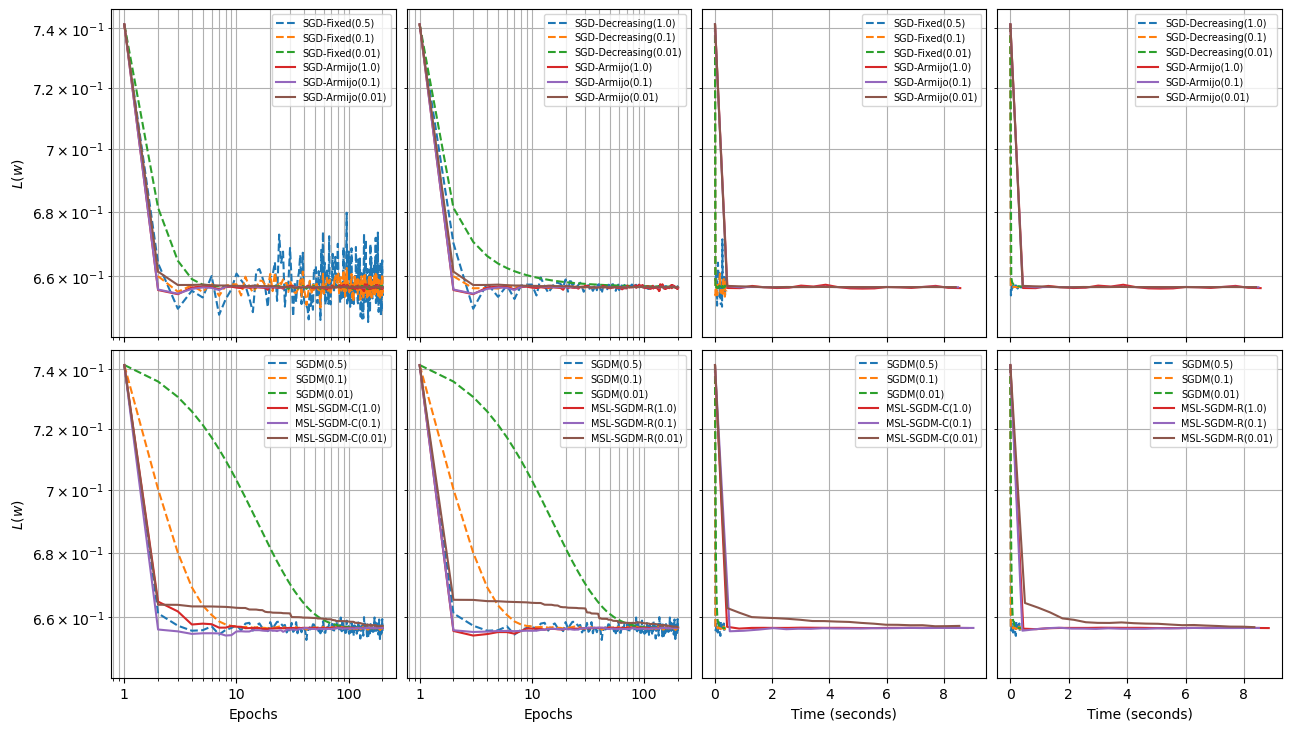

In [59]:
diagnostic(
    optim_data(sgdfixed_svm + sgdarmijo_svm),
    optim_data(sgddecre_svm + sgdarmijo_svm),
    optim_data(sgdm_svm + mslc_svm),
    optim_data(sgdm_svm + mslr_svm),
    benchSvm[0])
plt.savefig("./plots/svm-diagnostic.pdf")

## Fine-tuning

In [60]:
batchfixed_svm1 = LogisticRegression("SGD-Fixed", C).fit(data_svm, ktuning, data_svm[1].size, 0.75, stop=1)

In [61]:
sgdfixed_svm1 = LogisticRegression("SGD-Fixed", C).fit(data_svm, ktuning, Msvm, 0.01, stop=1)

In [62]:
sgddecre_svm1 = LogisticRegression("SGD-Decreasing", C).fit(data_svm, ktuning, Msvm, 1, stop=1)

In [63]:
sgdm_svm1 = LogisticRegression("SGDM", C).fit(data_svm, ktuning, Msvm, 0.05, 0.9, stop=1)

In [64]:
sgdarmijo_svm1 = LogisticRegression("SGD-Armijo", C).fit(data_svm, ktuning, Msvm, 0.25, stop=1)

In [65]:
mslc_svm1 = LogisticRegression("MSL-SGDM-C", C).fit(data_svm, ktuning, Msvm, 0.1, 0.9, stop=1)

In [66]:
mslr_svm1 = LogisticRegression("MSL-SGDM-R", C).fit(data_svm, ktuning, Msvm, 0.5, 0.9, stop=1)

In [67]:
fine_svm_data = optim_data([batchfixed_svm1, sgdfixed_svm1, sgddecre_svm1, sgdm_svm1, sgdarmijo_svm1, mslc_svm1, mslr_svm1])

test_svm = models_summary(fine_svm_data, benchSvm_data)
test_svm.sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.673302,3.544459e-07,NaN,5,0.653933,0.51675,0.181772
2,CG,1,NaN,NaN,NaN,0.673302,8.300304e-06,NaN,8,0.653933,0.51675,0.181772
0,L-BFGS,1,NaN,NaN,NaN,0.673302,1.321807e-05,NaN,5,0.653933,0.51625,0.181772
3,SGD-Fixed,1,3089.0,0.75,0.0,0.673302,2.403935e-04,0.005852,6,0.653933,0.51625,0.181779
9,MSL-SGDM-R,1,32.0,0.50,0.9,0.673303,6.163714e-04,3.628491,84,0.653610,0.51600,0.181937
4,SGD-Fixed,1,32.0,0.01,0.0,0.673303,8.231604e-04,0.022430,9,0.653933,0.51700,0.181521
5,SGD-Decreasing,1,32.0,1.00,0.0,0.673303,9.352571e-04,0.191860,108,0.653610,0.51600,0.182320
6,SGDM,1,32.0,0.05,0.9,0.673303,8.809781e-04,0.055281,30,0.653933,0.51625,0.181381
8,MSL-SGDM-C,1,32.0,0.10,0.9,0.673303,9.008485e-04,6.613781,156,0.653933,0.51600,0.181882
7,SGD-Armijo,1,32.0,0.25,0.0,0.673303,9.916597e-04,1.368975,32,0.653933,0.51700,0.181951


In [68]:
print(test_svm[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
L-BFGS & NaN & 5 & NaN & 0.673302 & 0.000013 & 0.516250 \\
Newton-CG & NaN & 5 & NaN & 0.673302 & 0.000000 & 0.516750 \\
CG & NaN & 8 & NaN & 0.673302 & 0.000008 & 0.516750 \\
SGD-Fixed & 0.750000 & 6 & 0.005852 & 0.673302 & 0.000240 & 0.516250 \\
SGD-Fixed & 0.010000 & 9 & 0.022430 & 0.673303 & 0.000823 & 0.517000 \\
SGD-Decreasing & 1.000000 & 108 & 0.191860 & 0.673303 & 0.000935 & 0.516000 \\
SGDM & 0.050000 & 30 & 0.055281 & 0.673303 & 0.000881 & 0.516250 \\
SGD-Armijo & 0.250000 & 32 & 1.368975 & 0.673303 & 0.000992 & 0.517000 \\
MSL-SGDM-C & 0.100000 & 156 & 6.613781 & 0.673303 & 0.000901 & 0.516000 \\
MSL-SGDM-R & 0.500000 & 84 & 3.628491 & 0.673303 & 0.000616 & 0.516000 \\
\bottomrule
\end{tabular}



# Australian

In [6]:
data_austr = load_australian()

X_train = (552, 15), y_train = (552,)
X_test = (138, 15), y_test = (138,)
Class distribution: {-1.0: 0.5362318840579711, 1.0: 0.463768115942029}
sklearn train score: 0.867754
sklearn test score: 0.862319
sklearn sol norm: 3.4331049997375587


In [70]:
#CAustr = 1
MAustr = 8
#kAustr = 200
print(f"Iterations: {data_austr[1].size / MAustr}")

Iterations: 69.0


## Benchmark

In [71]:
benchAustr = run_bench(data_austr, C)

benchAustr_data = optim_bench(benchAustr)

## SGD

In [72]:
# BatchGD-Fixed
batchfixed_austr = run_solvers("SGD-Fixed", C, data_austr, kdiagnostic, data_austr[1].size, (1, 0.1, 0.01))

In [73]:
# SGD-Fixed
sgdfixed_austr = run_solvers("SGD-Fixed", C, data_austr, kdiagnostic, MAustr, (0.3, 0.1, 0.01))

In [74]:
# SGD-Decreasing
sgddecre_austr = run_solvers("SGD-Decreasing", C, data_austr, kdiagnostic, MAustr, (0.5, 0.1, 0.01))

In [75]:
# SGDM
sgdm_austr = run_solvers("SGDM", C, data_austr, kdiagnostic, MAustr, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [76]:
# SGD-Armijo
sgdarmijo_austr = run_solvers("SGD-Armijo", C, data_austr, kdiagnostic, MAustr, (1, 0.1, 0.01))

In [77]:
# MSL-SGDM-C
mslc_austr = run_solvers("MSL-SGDM-C", C, data_austr, kdiagnostic, MAustr, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [78]:
# MSL-SGDM-R
mslr_austr = run_solvers("MSL-SGDM-R", C, data_austr, kdiagnostic, MAustr, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [79]:
modelsAustr_data = optim_data(batchfixed_austr + sgdfixed_austr + sgddecre_austr + sgdm_austr + sgdarmijo_austr + mslc_austr + mslr_austr)

## Summary

In [80]:
models_summary(modelsAustr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,552.0,0.10,0.0,0.615582,8.355306e-10,0.021620,200,0.855072,0.876812,0.335336
1,Newton-CG,1,NaN,NaN,NaN,0.615582,1.326493e-06,NaN,7,0.855072,0.876812,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,3.613973e-06,NaN,7,0.855072,0.876812,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,5.034286e-06,NaN,8,0.855072,0.876812,0.335336
10,SGD-Decreasing,1,8.0,0.10,0.0,0.615582,1.630153e-04,0.215909,200,0.855072,0.876812,0.335333
9,SGD-Decreasing,1,8.0,0.50,0.0,0.615583,2.487715e-03,0.209816,200,0.858696,0.876812,0.335351
14,SGDM,1,8.0,0.01,0.9,0.615584,2.557471e-03,0.203339,200,0.851449,0.876812,0.334941
16,SGD-Armijo,1,8.0,0.10,0.0,0.615589,4.198335e-03,2.436682,200,0.853261,0.884058,0.334745
13,SGDM,1,8.0,0.10,0.9,0.615591,4.997040e-03,0.230048,200,0.851449,0.876812,0.333690
17,SGD-Armijo,1,8.0,0.01,0.0,0.615592,4.683017e-03,2.485149,200,0.853261,0.876812,0.335242


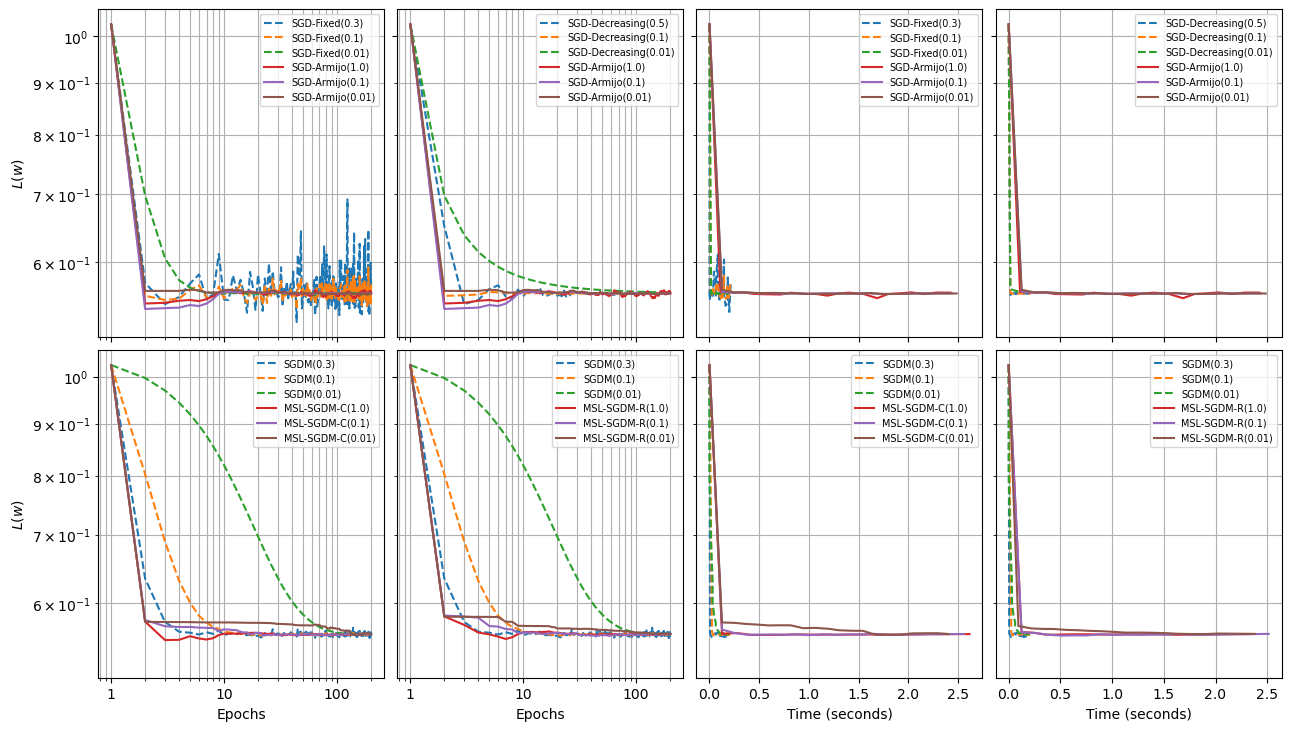

In [81]:
diagnostic(
    optim_data(sgdfixed_austr + sgdarmijo_austr),
    optim_data(sgddecre_austr + sgdarmijo_austr),
    optim_data(sgdm_austr + mslc_austr),
    optim_data(sgdm_austr + mslr_austr),
    benchAustr[0])
plt.savefig("./plots/austr-diagnostic.pdf")

## Fine-tuning

In [82]:
batchfixed_austr1 = LogisticRegression("SGD-Fixed", C).fit(data_austr, ktuning, data_austr[1].size, 0.2, stop=1)

In [83]:
sgdfixed_austr1 = LogisticRegression("SGD-Fixed", C).fit(data_austr, ktuning, MAustr, 0.001, stop=1)

In [84]:
sgddecre_austr1 = LogisticRegression("SGD-Decreasing", C).fit(data_austr, ktuning, MAustr, 0.05, stop=1)

In [85]:
sgdm_austr1 = LogisticRegression("SGDM", C).fit(data_austr, ktuning, MAustr, 0.02, 0.9, stop=1)

In [157]:
sgdarmijo_austr1 = LogisticRegression("SGD-Armijo", C).fit(data_austr, ktuning, MAustr, 0.01, stop=1)

In [176]:
mslc_austr1 = LogisticRegression("MSL-SGDM-C", C).fit(data_austr, ktuning, MAustr, 0.75, 0.9, stop=1)

In [170]:
mslr_austr1 = LogisticRegression("MSL-SGDM-R", C).fit(data_austr, ktuning, MAustr, 0.75, 0.9, stop=1)

In [177]:
fine_austr_data = optim_data([batchfixed_austr1, sgdfixed_austr1, sgddecre_austr1, sgdm_austr1, sgdarmijo_austr1, mslc_austr1, mslr_austr1])

test_austr = models_summary(fine_austr_data, benchAustr_data).sort_values(by=["l2-Loss", "Grad norm"])
test_austr

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.615582,0.000001,NaN,7,0.855072,0.876812,0.335336
0,L-BFGS,1,NaN,NaN,NaN,0.615582,0.000004,NaN,7,0.855072,0.876812,0.335336
2,CG,1,NaN,NaN,NaN,0.615582,0.000005,NaN,8,0.855072,0.876812,0.335336
3,SGD-Fixed,1,552.0,0.200,0.0,0.615582,0.000802,0.009413,34,0.855072,0.876812,0.335312
5,SGD-Decreasing,1,8.0,0.050,0.0,0.615582,0.000905,0.016108,18,0.855072,0.876812,0.335422
6,SGDM,1,8.0,0.020,0.9,0.615582,0.000939,0.200831,190,0.855072,0.876812,0.335080
4,SGD-Fixed,1,8.0,0.001,0.0,0.615582,0.000951,0.103320,108,0.855072,0.876812,0.335382
7,SGD-Armijo,1,8.0,0.010,0.0,0.615585,0.002708,4.974363,400,0.855072,0.876812,0.335460
8,MSL-SGDM-C,1,8.0,0.750,0.9,0.615588,0.004020,4.960708,400,0.855072,0.876812,0.335438
9,MSL-SGDM-R,1,8.0,0.750,0.9,0.615589,0.004221,4.899550,400,0.855072,0.876812,0.335426


In [90]:
print(test_austr[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.615582 & 0.000001 & 0.876812 \\
L-BFGS & NaN & 7 & NaN & 0.615582 & 0.000004 & 0.876812 \\
CG & NaN & 8 & NaN & 0.615582 & 0.000005 & 0.876812 \\
SGD-Fixed & 0.200000 & 34 & 0.009413 & 0.615582 & 0.000802 & 0.876812 \\
SGD-Decreasing & 0.050000 & 18 & 0.016108 & 0.615582 & 0.000905 & 0.876812 \\
SGDM & 0.020000 & 190 & 0.200831 & 0.615582 & 0.000939 & 0.876812 \\
SGD-Fixed & 0.001000 & 108 & 0.103320 & 0.615582 & 0.000951 & 0.876812 \\
SGD-Armijo & 0.010000 & 400 & 4.698788 & 0.615585 & 0.002708 & 0.876812 \\
MSL-SGDM-C & 0.050000 & 400 & 4.884275 & 0.615603 & 0.006624 & 0.876812 \\
MSL-SGDM-R & 0.050000 & 400 & 5.065207 & 0.615611 & 0.007657 & 0.876812 \\
\bottomrule
\end{tabular}



# Mushrooms

In [7]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}
sklearn train score: 1.000000
sklearn test score: 1.000000
sklearn sol norm: 11.74605798576869


In [92]:
#Cmush = 1
Mmush = 64
#kmush = 200
print(f"Iterations: {data_mush[1].size / Mmush}")

Iterations: 101.546875


## Benchmark

In [93]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## SGD

In [94]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, kdiagnostic, data_mush[1].size, (1, 0.1, 0.01))

In [95]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, kdiagnostic, Mmush, (0.3, 0.1, 0.01))

In [96]:
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, kdiagnostic, Mmush, (0.5, 0.1, 0.01))

In [97]:
# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, kdiagnostic, Mmush, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [98]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01))

In [99]:
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, kdiagnostic, Mmush, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [100]:
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, kdiagnostic, Mmush, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [101]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [102]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
4,SGD-Fixed,1,6499.0,0.10,0.0,0.580925,3.551600e-09,0.620801,200,0.892291,0.886154,0.399399
1,Newton-CG,1,NaN,NaN,NaN,0.580925,1.380831e-04,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,6.046219e-06,NaN,9,0.892291,0.886154,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,2.245995e-05,NaN,10,0.892291,0.886154,0.399399
10,SGD-Decreasing,1,64.0,0.10,0.0,0.580925,2.539729e-04,0.564067,200,0.892291,0.886154,0.399416
9,SGD-Decreasing,1,64.0,0.50,0.0,0.580925,7.294569e-04,0.535494,200,0.892291,0.886154,0.399642
14,SGDM,1,64.0,0.01,0.9,0.580925,1.013412e-03,0.519325,200,0.892445,0.886769,0.399508
13,SGDM,1,64.0,0.10,0.9,0.580928,2.679719e-03,0.548754,200,0.892599,0.886154,0.399616
16,SGD-Armijo,1,64.0,0.10,0.0,0.580932,3.836039e-03,16.891272,200,0.892291,0.886154,0.399244
17,SGD-Armijo,1,64.0,0.01,0.0,0.580933,4.144639e-03,16.156929,200,0.892291,0.886154,0.399049


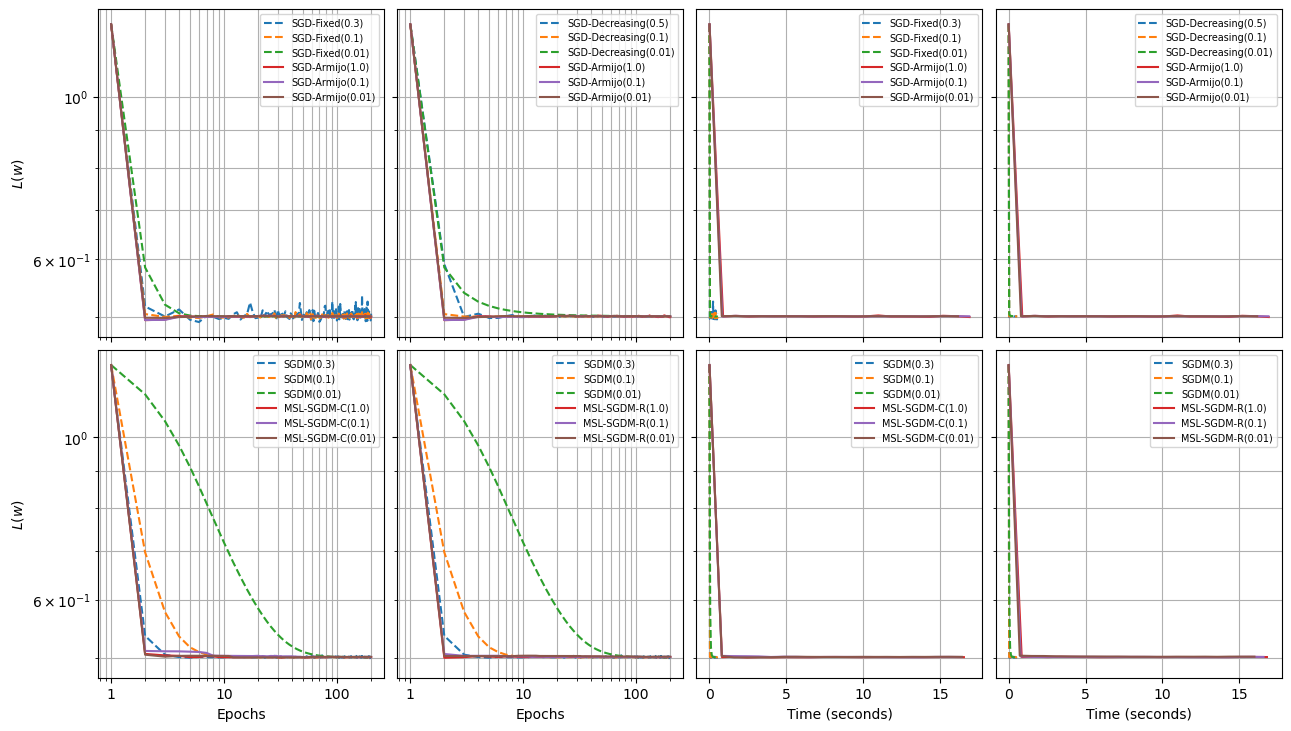

In [103]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

## Fine-tuning

In [104]:
batchfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, ktuning, data_mush[1].size, 0.05, stop=1)

In [105]:
sgdfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, ktuning, Mmush, 0.001, stop=1)

In [106]:
sgddecre_mush1 = LogisticRegression("SGD-Decreasing", C).fit(data_mush, ktuning, Mmush, 0.1, stop=1)

In [107]:
sgdm_mush1 = LogisticRegression("SGDM", C).fit(data_mush, ktuning, Mmush, 0.03, 0.9, stop=1)

In [206]:
sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", C).fit(data_mush, ktuning, Mmush, 0.01, stop=1)

In [207]:
mslc_mush1 = LogisticRegression("MSL-SGDM-C", C).fit(data_mush, ktuning, Mmush, 0.025, 0.9, stop=1)

In [208]:
mslr_mush1 = LogisticRegression("MSL-SGDM-R", C).fit(data_mush, ktuning, Mmush, 0.025, 0.9, stop=1)

In [209]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.580925,0.000138,NaN,8,0.892291,0.886154,0.399399
0,L-BFGS,1,NaN,NaN,NaN,0.580925,0.000006,NaN,9,0.892291,0.886154,0.399378
2,CG,1,NaN,NaN,NaN,0.580925,0.000022,NaN,10,0.892291,0.886154,0.399399
4,SGD-Fixed,1,64.0,0.001,0.0,0.580925,0.000755,0.269500,90,0.892291,0.886154,0.399440
6,SGDM,1,64.0,0.030,0.9,0.580925,0.000988,0.177628,72,0.892445,0.886154,0.399445
5,SGD-Decreasing,1,64.0,0.100,0.0,0.580925,0.000996,0.066610,26,0.892445,0.886154,0.399305
3,SGD-Fixed,1,6499.0,0.050,0.0,0.580925,0.000977,0.514525,168,0.892291,0.886154,0.399396
7,SGD-Armijo,1,64.0,0.010,0.0,0.580928,0.002399,33.073463,400,0.892291,0.886154,0.399466
9,MSL-SGDM-R,1,64.0,0.025,0.9,0.580944,0.006185,32.783562,400,0.892291,0.886154,0.399184
8,MSL-SGDM-C,1,64.0,0.025,0.9,0.580945,0.006402,31.794066,400,0.892137,0.886154,0.399288


In [112]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 8 & NaN & 0.580925 & 0.000138 & 0.886154 \\
L-BFGS & NaN & 9 & NaN & 0.580925 & 0.000006 & 0.886154 \\
CG & NaN & 10 & NaN & 0.580925 & 0.000022 & 0.886154 \\
SGD-Fixed & 0.001000 & 90 & 0.269500 & 0.580925 & 0.000755 & 0.886154 \\
SGDM & 0.030000 & 72 & 0.177628 & 0.580925 & 0.000988 & 0.886154 \\
SGD-Decreasing & 0.100000 & 26 & 0.066610 & 0.580925 & 0.000996 & 0.886154 \\
SGD-Fixed & 0.050000 & 168 & 0.514525 & 0.580925 & 0.000977 & 0.886154 \\
MSL-SGDM-R & 0.500000 & 400 & 34.007179 & 0.580931 & 0.003594 & 0.886154 \\
MSL-SGDM-C & 0.200000 & 400 & 33.296487 & 0.580932 & 0.003864 & 0.886154 \\
SGD-Armijo & 0.250000 & 400 & 33.290282 & 0.580947 & 0.007006 & 0.886154 \\
\bottomrule
\end{tabular}



# German

In [8]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}
sklearn train score: 0.782500
sklearn test score: 0.780000
sklearn sol norm: 2.3059775145851873


In [114]:
#Cgerman = 1
Mgerman = 8
#kgerman = 200
print(f"Iterations: {data_german[1].size / Mgerman}")

Iterations: 100.0


## Benchmark

In [115]:
benchgerman = run_bench(data_german, C)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [116]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, data_german, kdiagnostic, data_german[1].size, (1, 0.1, 0.01))

In [117]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, data_german, kdiagnostic, Mgerman, (0.3, 0.1, 0.01))

In [118]:
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, data_german, kdiagnostic, Mgerman, (0.5, 0.1, 0.01))

In [119]:
# SGDM
sgdm_german = run_solvers("SGDM", C, data_german, kdiagnostic, Mgerman, (0.3, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [120]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, data_german, kdiagnostic, Mgerman, (1, 0.1, 0.01))

In [121]:
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, data_german, kdiagnostic, Mgerman, (1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [122]:
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, data_german, kdiagnostic, Mgerman, step_size=(1, 0.1, 0.01), momentum=(0.9, 0.9, 0.9))

In [123]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [124]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.700,0.248168
4,SGD-Fixed,1,800.0,0.10,0.0,0.619120,1.019632e-09,0.063010,200,0.70125,0.700,0.248168
0,L-BFGS,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.700,0.248163
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.700,0.248168
10,SGD-Decreasing,1,8.0,0.10,0.0,0.619120,2.758767e-04,0.399075,200,0.70125,0.700,0.248174
14,SGDM,1,8.0,0.01,0.9,0.619122,2.240961e-03,0.398416,200,0.70125,0.700,0.248207
9,SGD-Decreasing,1,8.0,0.50,0.0,0.619124,4.778694e-03,0.358794,200,0.70125,0.700,0.246668
17,SGD-Armijo,1,8.0,0.01,0.0,0.619134,5.432946e-03,5.396123,200,0.70125,0.700,0.249380
11,SGD-Decreasing,1,8.0,0.01,0.0,0.619139,6.260069e-03,0.384661,200,0.70125,0.700,0.248052
16,SGD-Armijo,1,8.0,0.10,0.0,0.619147,8.456955e-03,5.698467,200,0.70125,0.700,0.250461


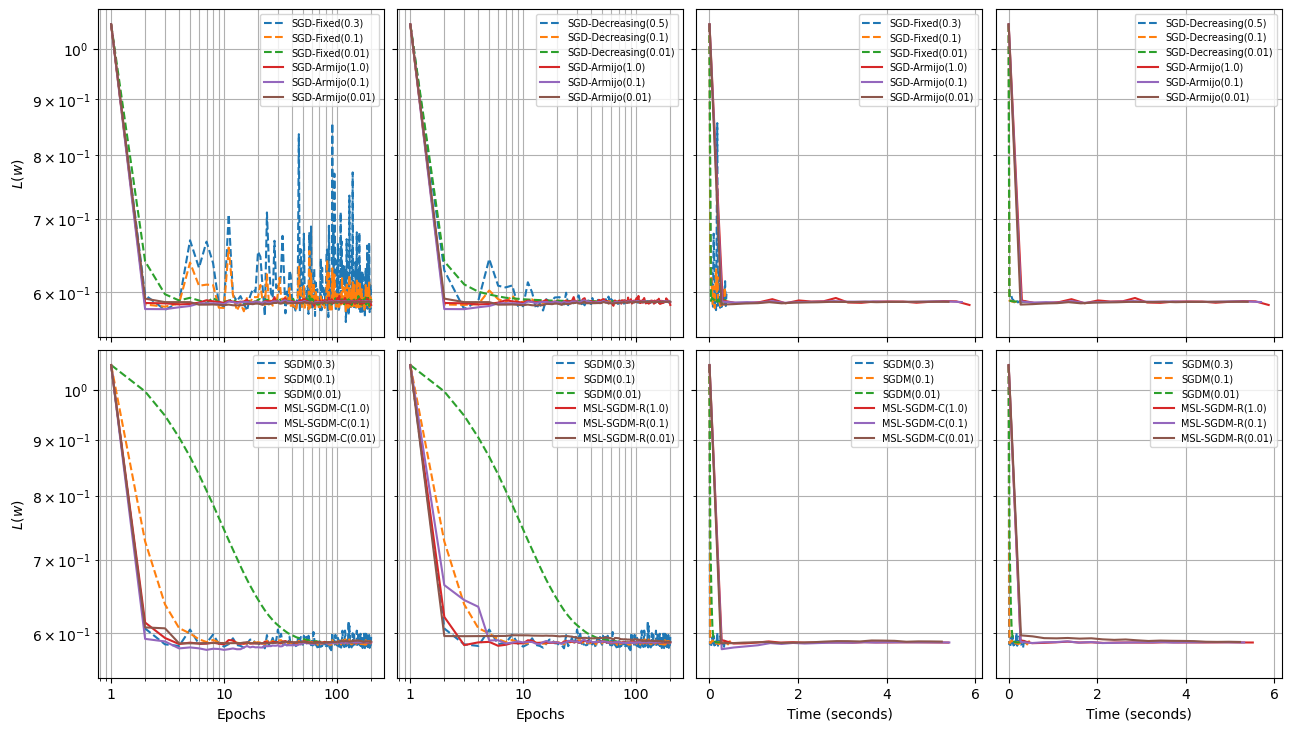

In [125]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

## Fine-tuning

In [198]:
batchfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, ktuning, data_german[1].size, 0.5, stop=1)

In [199]:
sgdfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, ktuning, Mgerman, 0.001, stop=1)

In [200]:
sgddecre_german1 = LogisticRegression("SGD-Decreasing", C).fit(data_german, ktuning, Mgerman, 0.25, stop=1)

In [201]:
sgdm_german1 = LogisticRegression("SGDM", C).fit(data_german, ktuning, Mgerman, 0.005, 0.9, stop=1)

In [218]:
sgdarmijo_german1 = LogisticRegression("SGD-Armijo", C).fit(data_german, ktuning, Mgerman, 0.05, stop=1)

In [219]:
mslc_german1 = LogisticRegression("MSL-SGDM-C", C).fit(data_german, ktuning, Mgerman, 0.5, 0.9, stop=1)

In [220]:
mslr_german1 = LogisticRegression("MSL-SGDM-R", C).fit(data_german, ktuning, Mgerman, 0.5, 0.9, stop=1)

In [221]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Sol norm
1,Newton-CG,1,NaN,NaN,NaN,0.619120,7.208674e-07,NaN,7,0.70125,0.7,0.248168
0,L-BFGS,1,NaN,NaN,NaN,0.619120,8.766908e-06,NaN,10,0.70125,0.7,0.248163
2,CG,1,NaN,NaN,NaN,0.619120,1.698375e-05,NaN,9,0.70125,0.7,0.248168
3,SGD-Fixed,1,800.0,0.500,0.0,0.619120,6.133016e-04,0.004999,12,0.70125,0.7,0.248084
4,SGD-Fixed,1,8.0,0.001,0.0,0.619120,9.006921e-04,0.190882,83,0.70125,0.7,0.248409
5,SGD-Decreasing,1,8.0,0.250,0.0,0.619121,8.989069e-04,0.351858,161,0.70125,0.7,0.248047
6,SGDM,1,8.0,0.005,0.9,0.619121,9.956598e-04,0.641088,363,0.70125,0.7,0.248053
8,MSL-SGDM-C,1,8.0,0.500,0.9,0.619128,4.180538e-03,10.937854,400,0.70125,0.7,0.248579
7,SGD-Armijo,1,8.0,0.050,0.0,0.619129,4.433419e-03,11.162459,400,0.70125,0.7,0.248681
9,MSL-SGDM-R,1,8.0,0.500,0.9,0.619130,4.580024e-03,11.506666,400,0.70125,0.7,0.248488


In [ ]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))